# Plotting Dynamic Time Warping

Plan here is to plot the dynamic time warping graphs that show the identification of the different points. The input data is three csv's found in this directory.



In [223]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# EB added in an attempt to add dates to x axoos
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
import datetime as DT

In [224]:
path = '/Users/elliebloom/Desktop/Masters/Project/Analysis/Lags/Outputs/dtw_results/Whole_period'

In [225]:
mobs = pd.read_csv(f'{path}/mob_series.csv')
r = pd.read_csv(f'{path}/r_series.csv')
dtwi = pd.read_csv(f'{path}/dtw_indices.csv')

In [226]:
mob_ind = np.asarray(dtwi['mob_index'])
r_ind = np.asarray(dtwi['r_index'])

In [227]:
dtwi = dtwi.drop(columns=['Unnamed: 0'])

In [228]:
def plot_timewarping(
    mobility_series: pd.DataFrame, 
    r_series: pd.DataFrame, 
    tw_indices: pd.DataFrame,
    plot_sparcity=5
):
    """
        Assumes that tw_indcies are in column order mobility then reproductive number (r)
    """
    inds = np.asarray(tw_indices)
    fig, ax = plt.subplots()
    mobility_series['series'].plot(label='Mobility')
    r_series['series'].plot(label='R(t)')
    c = 0
    for indices in inds:
        x_data = [indices[0]-1, indices[1]-1]
        y_data = [mobility_series['series'][indices[0]-1], r_series['series'][indices[1]-1]]
        if c%plot_sparcity == 0:
            plt.plot(x_data, y_data, 'gray', linestyle='--')
        c += 1
    plt.legend()
    plt.ylabel('Normalised time-series')
    #plt.xticks(list(mobility_series['series']), list(mobility_series['date_series']))
    
    start_date = np.min(mobility_series['date_series'])
    start_date = DT.datetime.strptime(start_date, "%Y-%m-%d").date()
    #start_date =  DT.datetime.strftime(start_date, "%d-%m-%Y") 

    
    def todate(x, pos, start=start_date):
        return start+DT.timedelta(days=x)
    fmt = ticker.FuncFormatter(todate)
    ax.xaxis.set_major_formatter(fmt)
    fig.autofmt_xdate(rotation=45)  
    

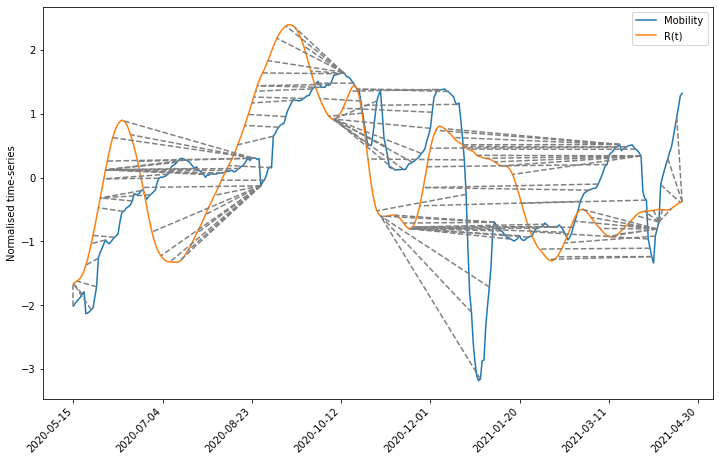

In [229]:
plot_timewarping(mobs, r, dtwi)

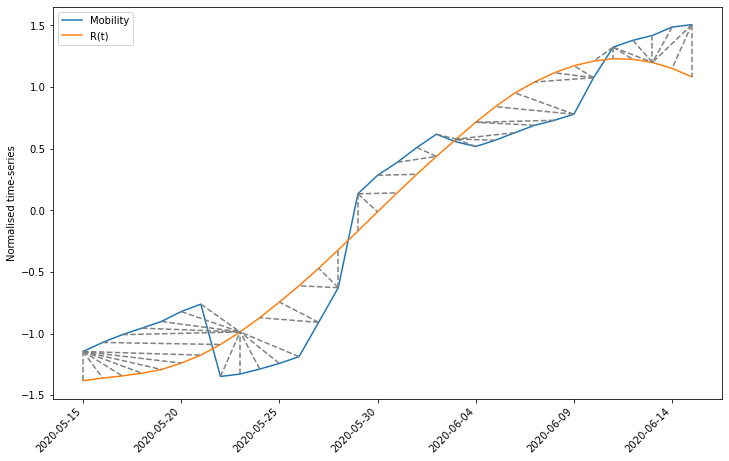

In [219]:
path = '/Users/elliebloom/Desktop/Masters/Project/Analysis/Lags/Outputs/dtw_results/Lockdown_1'
mobs = pd.read_csv(f'{path}/mob_series.csv')
r = pd.read_csv(f'{path}/r_series.csv')
dtwi = pd.read_csv(f'{path}/dtw_indices.csv')
dtwi = dtwi.drop(columns=['Unnamed: 0'])
plot_timewarping(mobs, r, dtwi,1)

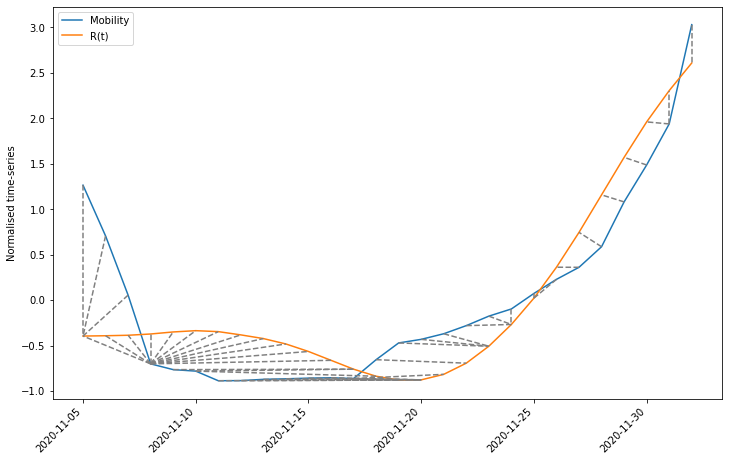

In [220]:
path = '/Users/elliebloom/Desktop/Masters/Project/Analysis/Lags/Outputs/dtw_results/Lockdown_2'
mobs = pd.read_csv(f'{path}/mob_series.csv')
r = pd.read_csv(f'{path}/r_series.csv')
dtwi = pd.read_csv(f'{path}/dtw_indices.csv')
dtwi = dtwi.drop(columns=['Unnamed: 0'])
plot_timewarping(mobs, r, dtwi,1)


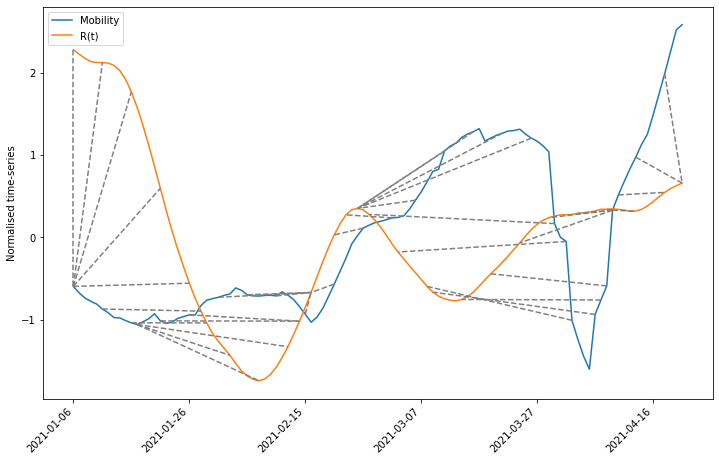

In [221]:
path = '/Users/elliebloom/Desktop/Masters/Project/Analysis/Lags/Outputs/dtw_results/Lockdown_3'
mobs = pd.read_csv(f'{path}/mob_series.csv')
r = pd.read_csv(f'{path}/r_series.csv')
dtwi = pd.read_csv(f'{path}/dtw_indices.csv')
dtwi = dtwi.drop(columns=['Unnamed: 0'])
plot_timewarping(mobs, r, dtwi,5)


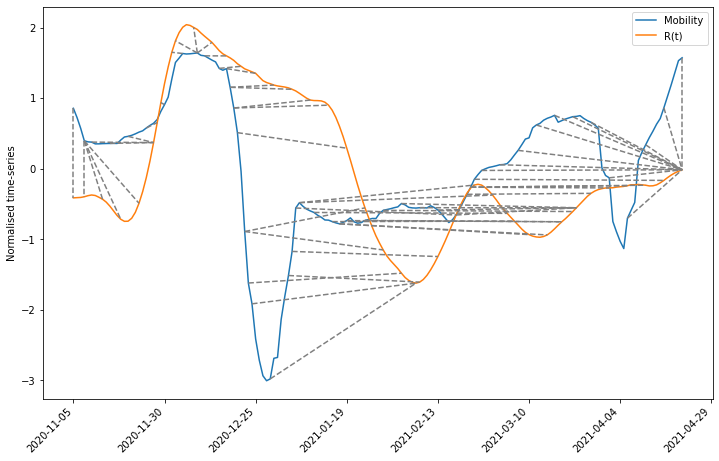

In [222]:
path = '/Users/elliebloom/Desktop/Masters/Project/Analysis/Lags/Outputs/dtw_results/Lockdown_2_3'
mobs = pd.read_csv(f'{path}/mob_series.csv')
r = pd.read_csv(f'{path}/r_series.csv')
dtwi = pd.read_csv(f'{path}/dtw_indices.csv')
dtwi = dtwi.drop(columns=['Unnamed: 0'])
plot_timewarping(mobs, r, dtwi,5)
